<a href="https://colab.research.google.com/github/brunoras/ames_house_prices/blob/main/Previs%C3%A3o_dos_Pre%C3%A7os_de_Im%C3%B3veis_de_Ames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão dos Preços de Imóveis de Ames, Iowa

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {"figure.figsize" : (11, 7)})

from scipy.stats import norm, skew
from scipy import stats
from scipy.special import boxcox1p

Apresentação do Dataset

In [ ]:
path = '/content/drive/MyDrive/Projeto Minha Casa/'
train = pd.read_csv(path + 'train.csv')
train.drop(['Id'], axis=1, inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test = pd.read_csv(path + 'test.csv')
test_id = test['Id']
test.drop(['Id'], axis=1, inplace=True)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print(f"Tamanho do treino: {len(train)}")
print(f"Tamanho do teste: {len(test)}")

Tamanho do treino: 1460
Tamanho do teste: 1459


Minhas interpretações sobre as features e algumas observações.

In [ ]:
my_obs = pd.read_csv(path + 'Avaliação das features do Ames Dataset.csv')
my_obs

,Feature,Tipo,Segmento,O que é,Observações
0,MSSubClass,int64,construção,como a casa foi descrita ao ser vendida,deveria ser categórica
1,MSZoning,object,localização,zona urbana ou rural,NaN
2,LotFrontage,float64,espaço,tamanho da faixada,NaN
3,LotArea,int64,espaço,área do terreno,NaN
4,Street,object,localização,se a rua é asfaltada,NaN
5,Alley,object,construção,corredor pra entrar na casa,NaN
6,LotShape,object,construção,formato da casa,NaN
7,LandContour,object,construção,terraplanagem,NaN
8,Utilities,object,construção,"acesso a serviços básicos (luz, água, etc)",NaN
9,LotConfig,object,construção,se tem mais uma frente,NaN


## Mudança de tipo de variável

De antemão vamos falar da feature "YearBuilt". Ela aparenta ter correlação com o alvo, como podemos ver graficamente.

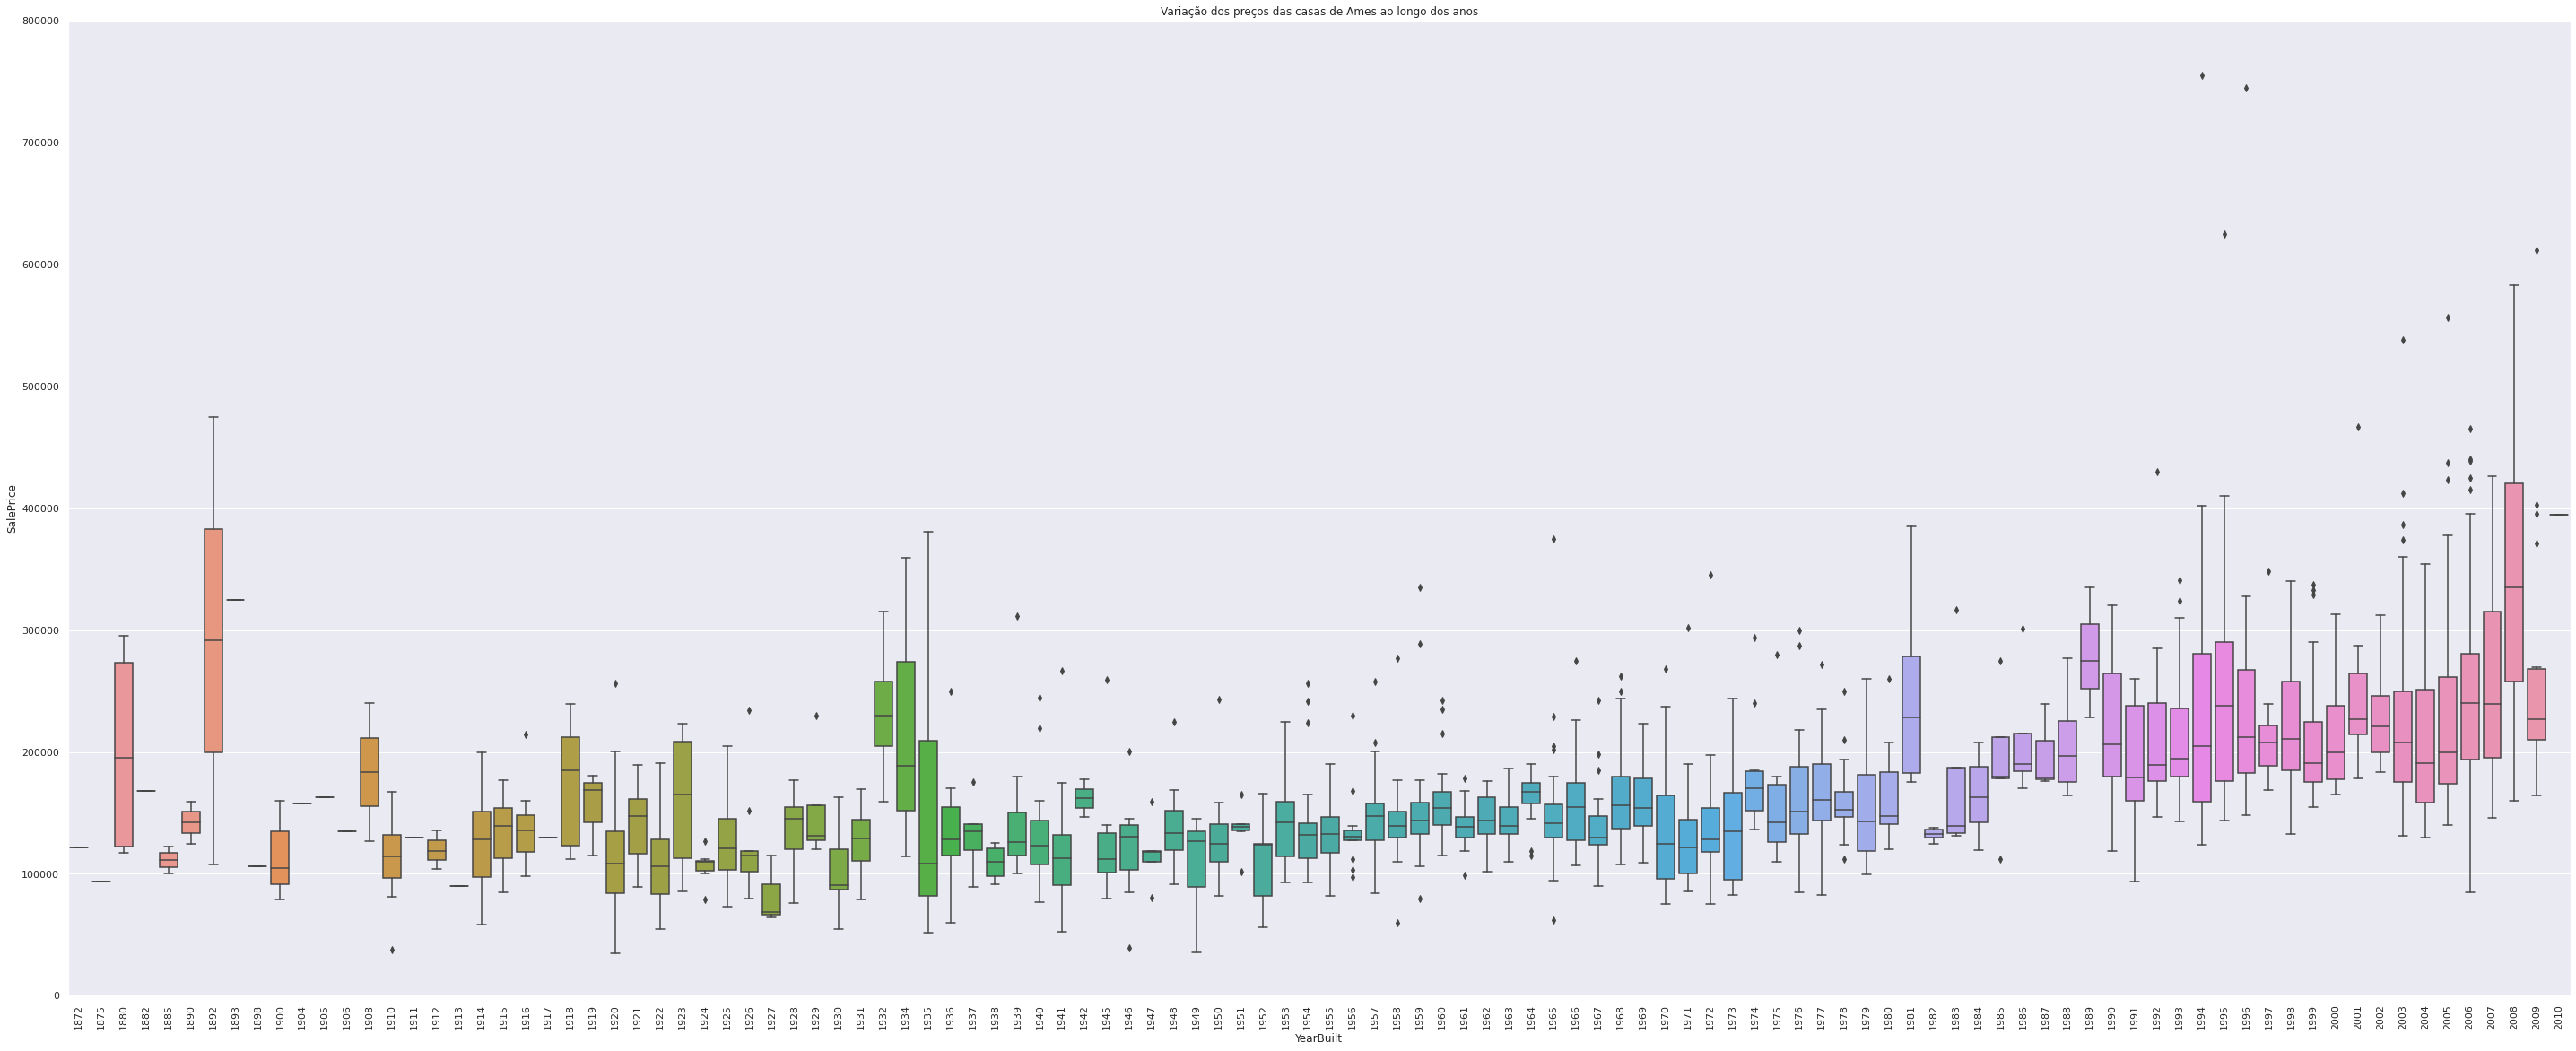

In [ ]:
dt = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(50, 20))
plt.title('Variação dos preços das casas de Ames ao longo dos anos')
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=dt)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Falamos de *preços constantes* quando nos referimos àqueles que servem de referência em um determinado momento para estabelecer uma comparação com os preços subsequentes. É um conceito muito utilizado no campo da economia e, mais especificamente, nas finanças.

Como não sabemos se o alvo está em preços constantes, que normalmente tentam remover o efeito da inflação, não podemos considerar a correlação do alvo com o ano de venda, portanto vamos tornar a feature "YearBuit" categórica.

Antes de continuarmos, por conveniência, vamos juntas o treino e o teste.

In [ ]:
dataset = pd.concat([train, test]).reset_index(drop=True)

Além do ano de venda, concluímos que "MSSubClass", "YearRemodAdd", "GarageYrBlt", "MoSold" e "YrSold" são variáveis numéricas, mas funcionam melhor se categóricas.

In [ ]:
to_str = ["MSSubClass", "YearBuilt", "YearRemodAdd",
          "GarageYrBlt", "MoSold", "YrSold"]

# Zerando os valores nulos de GarageYrBlt
dataset["GarageYrBlt"] = dataset["GarageYrBlt"].fillna(0)

dataset[to_str] = dataset[to_str].astype(str)

Temos duas features que dão nota para um aspecto das casa, "OverallQual" e "OverallCond". Temos outras features que dão nota mas usam strings.

As features são "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "KitchenQual", "GarageQual", "GarageCond", "PoolQC". Elas funcionam melhor como uma nota, assim como as duas anteriores.


Os valores destas features são:

* Ex:   Excellent
* Gd:   Good
* TA:   Average/Typical
* Fa:   Fair
* Po:   Poor
* nan: quando missing, a feature tem a pior nota, assim como dito no dicionário do dataset.

Vamos aproveitar e imputar valores faltantes nestas features.

In [ ]:
to_num = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
          'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

notas = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0}

for feat in to_num:
  dataset[feat] = dataset[feat].map(notas)

Após essas mudanças temos:

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## Valores Faltantes

Já que começamos a imputar valores nulos, vamos fazer com todas as features.

In [ ]:
def busca_nulos(data):
  total = data.isnull().sum().sort_values(ascending=False)
  porcentagem = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
  return missing_data[missing_data['Total'] > 0]

In [ ]:
busca_nulos(dataset)

,Total,Porcentagem
MiscFeature,2814,0.964
Alley,2721,0.932
Fence,2348,0.804
SalePrice,1459,0.500
LotFrontage,486,0.166
GarageFinish,159,0.054
GarageType,157,0.054
BsmtExposure,82,0.028
BsmtFinType2,80,0.027
BsmtFinType1,79,0.027


São poucas features com valores nulos e cada uma tem um significado pontuado no dicionário do dataset. Por isso vamos analisar cada uma individualmente.

Pensando nas features com maior porcentagem de nulos, inicialmente poderia ser uma boa estratégia removê-las, porém ter um fator adicional (elevador, 2ª garagem, cercado, corredor de entrada, etc.) impacta no valor da casa, por isso vamos imputar os valores nulos como o dicionário do dataset sugere.

Para as features a seguir dicionário nos diz que NA significa sem a feature. Portanto vamos imputar "None" nos nulos.

In [ ]:
missing_none = ['MiscFeature', 'Alley', 'Fence',
                'GarageType', 'GarageFinish', 'BsmtExposure',
                'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

for feat in missing_none:
  dataset[feat] = dataset[feat].fillna("None")

As features a seguir são numéricas e o dicionário sugere que um valor vazio é a falta da feature, logo vamos imputar zero nos nulos.

In [ ]:
missing_zero = ['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                'MasVnrType', 'MasVnrArea']

for feat in missing_zero:
  dataset[feat] = dataset[feat].fillna(0)

As features a seguir são categóricas. Vamos imputar o valor mais comum nos nulos.

In [ ]:
missing_mode = ['MSZoning', 'Electrical', 'Exterior1st',
                'Exterior2nd', 'SaleType']

for feat in missing_mode:
  dataset[feat] = dataset[feat].fillna(dataset[feat].mode()[0])

**LotFrontage**

O tamanho de cada rua conectada a uma casa em geral é similar para cada outra casa do mesmo bairro, logo podemos imputar os valores nulos com a mediana do bairro de cada casa.

In [ ]:
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

**Utilities**

Todos os valores do treino com excessão de 1 são o mesmo, logo está feature não vai nos ajudar. Vamos removê-la.

In [ ]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [ ]:
dataset.drop(['Utilities'], axis=1, inplace=True)

**Functional**

O dicionário nos diz que NA significa 'Typ': typical.

In [ ]:
dataset["Functional"] = dataset["Functional"].fillna("Typ")

Com isso não temos valores nulos tanto no treino quanto no teste, com excessão, claro, do valor dos imóveis no teste.

In [ ]:
busca_nulos(dataset)

,Total,Porcentagem
SalePrice,1459,0.500


## Correlações

Podemos ver pelo heatmap que temos algumas features bem correlacionadas com o alvo.

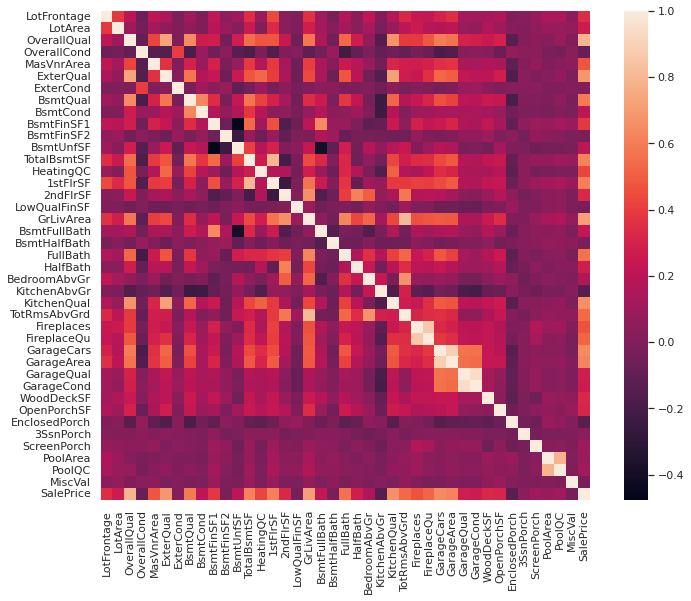

In [ ]:
corr = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, square=True);

Separarmos as features que tem correlação com o alvo maior em módulo que 0.4.

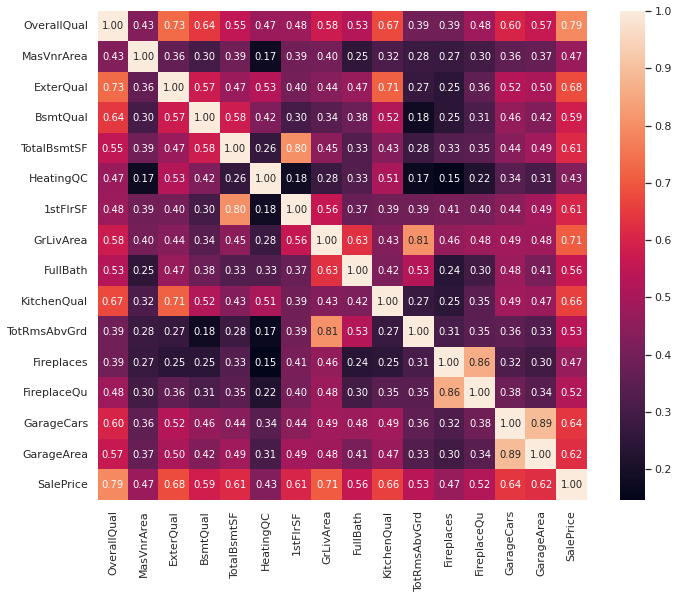

In [ ]:
high_corr = list(corr.index[abs(corr['SalePrice']) > 0.4])

f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(dataset[high_corr].corr(), 
                 cbar=True, annot=True, 
                 square=True, fmt='.2f', 
                 annot_kws={'size': 10})
plt.show()

Algumas features são muito correlacionadas entre si, além de terem alta correlação com o preço.

In [ ]:
dual = dataset[high_corr].corr()
dual[dual > 0.8]

,OverallQual,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,SalePrice
OverallQual,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExterQual,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtQual,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,NaN,NaN,1.000,NaN,0.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HeatingQC,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,NaN,NaN,NaN,NaN,0.801,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,0.808,NaN,NaN,NaN,NaN,NaN
FullBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN


As features com correlação entre si maior que 0.8 são:
* 1stFlrSF e TotalBsmtSF
* GrLivArea e TotRmsAbvGrd
* Fireplaces e FireplaceQu
* GarageArea e GarageCars

Destas so precisamos da primeira, portanto vamos remover a segunda.

In [ ]:
duplo = ['TotalBsmtSF', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageCars']
dataset.drop(duplo, axis=1, inplace=True)

## Outliers

A feature "GrLivArea" é a que tem maior correlação com o preço das casas. Vamos analisar a o scatterplot das duas.

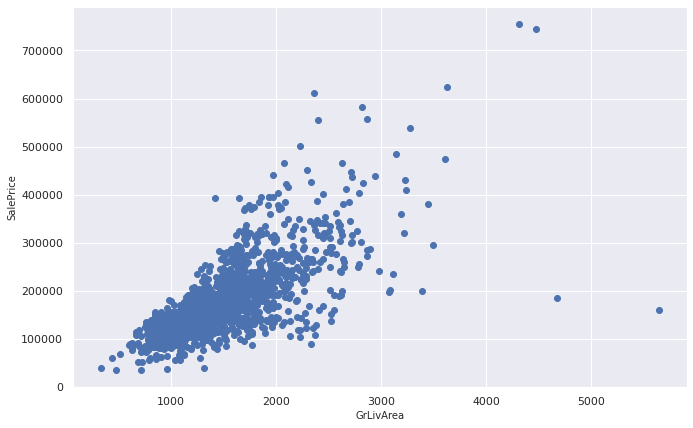

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=dataset['GrLivArea'], y=dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GrLivArea', fontsize=10)
plt.show()

Os dois valores com grande área e baixo preço são seguramente outliers, já os dois valores com alto preço seguem a linha de tendência e vamos mantê-los.

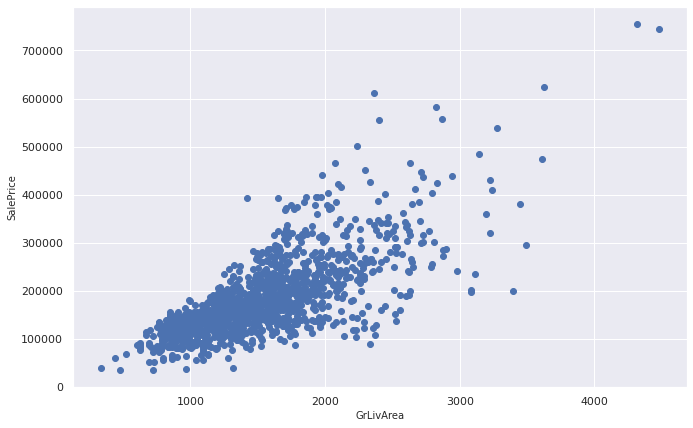

In [ ]:
outlier = train.loc[(train['GrLivArea']>4000) & (train['SalePrice']<300000)]
dataset = dataset.drop(outlier.index)

fig, ax = plt.subplots()
ax.scatter(dataset['GrLivArea'], dataset['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GrLivArea', fontsize=10)
plt.show()

## Alvo

Uma breve descrição do nosso alvo:

In [ ]:
dataset['SalePrice'].describe()

count     1458.000
mean    180932.919
std      79495.055
min      34900.000
25%     129925.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64


Graficamente vemos que:

* Parece com uma curva normal;
* Tem uma assimetria à direita (positiva);
* Tem um pico (leptocúrtica, curtose > 3).

In [ ]:
print(f"Skewness: {dataset['SalePrice'].skew(): .2f}")
print(f"Kurtosis: {dataset['SalePrice'].kurt(): .2f}")

Skewness:  1.88
Kurtosis:  6.52


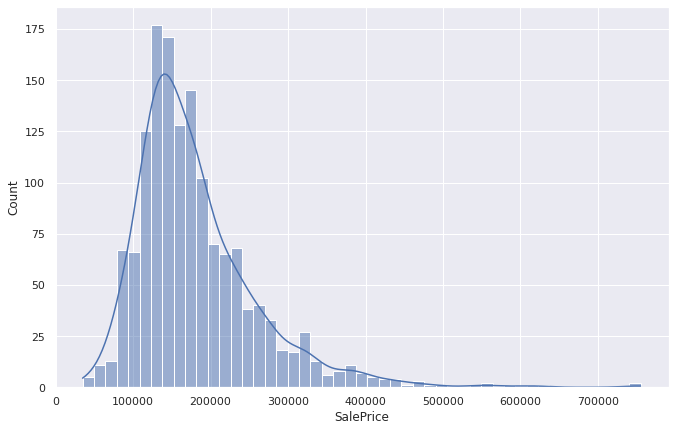

In [ ]:
sns.histplot(dataset['SalePrice'], kde=True);

Além disso, 'SalePrice' não segue a diagonal no plot de probabilidade.

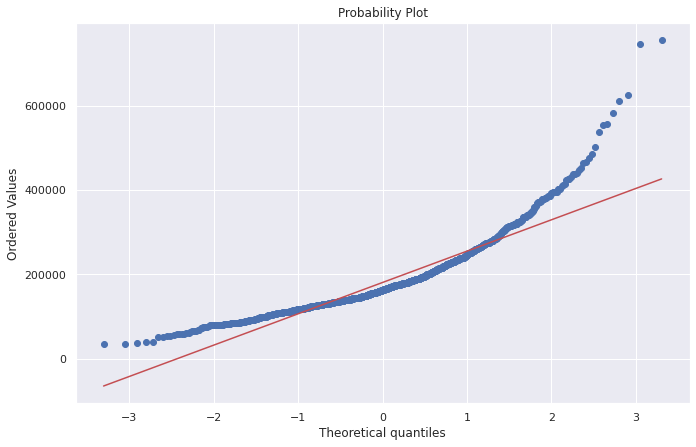

In [ ]:
stats.probplot(dataset['SalePrice'][:1458], plot=plt)
plt.show()

Vamos fazer uma transformação logarítmica na curva. Como temos valores iguais a zero, vamos somar com 1 cada valor antes. A função log1p da numpy já faz todo o trabalho.

In [ ]:
dataset["SalePrice"] = np.log1p(dataset["SalePrice"])

Isso é suficiente para normalizar a curva.

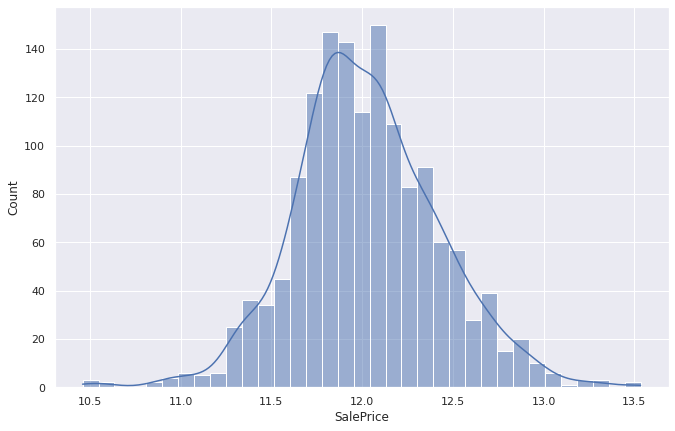

In [ ]:
sns.histplot(dataset['SalePrice'], kde=True);

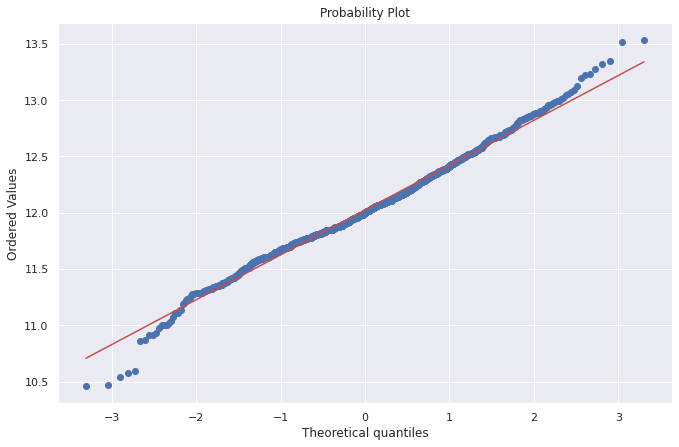

In [ ]:
stats.probplot(dataset['SalePrice'][:1458], plot=plt)
plt.show()

Agora vamos trabalhar a assimetria das outras features.

In [ ]:
num_feats = dataset.drop('SalePrice', axis=1).dtypes[dataset.dtypes != "object"].index

skew_feats = dataset[num_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skew_feats})
skewness[skewness['Skew'] > 1]

,Skew
MiscVal,21.940
PoolQC,19.549
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


Para estas features, vamos usar a transformação Cox-Box, que é um passo além da transformação logarítmica.

In [ ]:
skewness = skewness[abs(skewness) > 0.75]

skewed_features = skewness.index
lamb = 0.15
for feat in skewed_features:
    dataset[feat] = boxcox1p(dataset[feat], lamb)

## One-Hot Encoding

Caso substituíssemos os valores das features categóricas por números (0, 1, 2...), o modelo iria interpretar que o valor 2 é maior que 1 e 0 e não queremos isso. Para o Modelo ter a interpretação correta, vamos usar o One-Hot Encoding nelas.

In [ ]:
dataset = pd.get_dummies(dataset)

Com todos os ajustes, vamos separar novamente o treino do teste.

In [ ]:
train = dataset[:1458]
y_train = train['SalePrice'].values
train = train.drop('SalePrice', axis=1)
test = dataset[1458:]
test = test.drop('SalePrice', axis=1)

In [ ]:
print(f"Tamanho do treino: {len(train)}")
print(f"Tamanho do teste: {len(test)}")

Tamanho do treino: 1458
Tamanho do teste: 1459


## Construção dos modelos

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

**Validador**

In [ ]:
def rmsle_cv(model, folds=5):
    kf = KFold(folds, shuffle=True, random_state=69).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

**Lasso**

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=69))

**Elastic Net Regression**

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=69))

**Kernel Ridge Regression**

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

**Gradient Boosting Regression**

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =69)

**XGBoost**

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4, gamma=0.04, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7, n_estimators=2200,
                             reg_alpha=0.4, reg_lambda=0.8,
                             subsample=0.5, silent=1,
                             random_state =69, nthread = -1)

**LightGBM**

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
modelos = [lasso, ENet, KRR, GBoost, model_xgb, model_lgb]

Vamos avaliar cada modelo com uma validação cruzada de 5 folds.

In [ ]:
for mol in modelos:
  score = rmsle_cv(mol)
  print(f"\n{mol} \nScore: {score.mean():.5f} ({score.std():.5f})\n")


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=69))]) 
Score: 0.11665 (0.00632)


Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=69))]) 
Score: 0.11675 (0.00630)


KernelRidge(alpha=0.6, coef0=2.5, degree=2, kernel='polynomial') 
Score: 0.12030 (0.00494)


GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=69) 
Score: 0.11768 (0.00832)


XGBRegressor(colsample_bytree=0.4, gamma=0.04, learning_rate=0.05,
             min_child_weight=1.7, n_estimators=2200, nthread=-1,
             random_state=69, reg_alpha=0.4, reg_lambda=0.8, silent=1,
             subsample=0.5) 
Score: 0.11723 (0.00734)


LGBMRegressor(bagging_fraction=0.8, ba

## Empilhando Modelos

Vamos criar uma classe com uma função fit e uma função predict.

Nesta classe, temos um método de empilhamento de modelos, onde treinamos clones dos modelos, fazemos previsões, e criamos uma nova feature com a média das previsões. Depois treinamos e testamos um meta-modelo com a adição desta nova feature.

In [ ]:
class EmpilhaModelos(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # Vamos fitar usando clones dos modelos
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=69)
        
        # Treinando os modelos base clonados e criando as predições para treinar o meta-modelo
        out_of_fold_pred = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_pred[holdout_index, i] = y_pred
                
        # Treinando o meta-modelo clonado usando as previsões como uma nova feature
        self.meta_model_.fit(out_of_fold_pred, y)
        return self

    # Prevendo com todos os modelos no teste e usando a média como uma meta-feature
    # para a predição final usando o meta-modelo
    def predict(self, X):
        meta_features = np.column_stack([np.column_stack(
                                        [model.predict(X) for model in base_models]).mean(axis=1)
                                        for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

Vamos fazer a validação cruzada com 5 folds usando os seis modelos e o lasso como meta-modelo, pois ele performou melhor individualmente.

In [ ]:
modelos_empilhados = EmpilhaModelos(base_models = modelos,
                                    meta_model = lasso)

score = rmsle_cv(modelos_empilhados)
print(f"Score: {score.mean():.5f} ({score.std():.5f})")

Score: 0.11076 (0.00657)


Por fim, vamos treinar o modelo empilhado e calcular o erro médio.

In [ ]:
modelos_empilhados.fit(train.values, y_train)
emp_train_pred = modelos_empilhados.predict(train.values)
emp_pred = np.expm1(modelos_empilhados.predict(test.values))
print(f"Erro médio: {rmsle(y_train, emp_train_pred):.5f}")

Erro médio: 0.08212


E temos a submissão para a competição.

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = emp_pred
sub.to_csv(path + 'submission.csv', index=False)
sub

,Id,SalePrice
0,1461,125917.973
1,1462,163684.710
2,1463,184341.981
3,1464,194621.807
4,1465,195000.036
...,...,...
1454,2915,84026.672
1455,2916,83378.857
1456,2917,161445.284
1457,2918,115448.984


Está submissão teve erro médio de 0.12169, top 9% na competição, no dia 16 de julho de 2021.